In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as pl
from matplotlib import rcParams
import seaborn as sns

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

/home/py_3/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/py_3/miniconda3/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  from numba.targets.imputils import impl_ret_borrowed, lower_constant
/home/py_3/miniconda3/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.targets.imputils', please update to use 'numba.core.imputils' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.targets.imputils import impl_ret_borrowed, lower_constant
/home

scanpy==1.4.6 anndata==0.7.1 umap==0.4.1 numpy==1.18.3 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [2]:
adata = sc.read_h5ad("5.scanpy_umap_B.h5ad")

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:09:53)


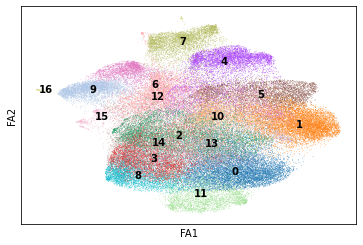

In [3]:
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color='leiden', legend_loc='on data',title = "")

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:09)
--> added 'pos', the PAGA positions (adata.uns['paga'])


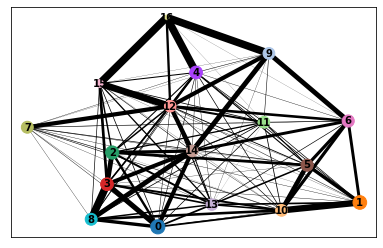

In [4]:
# Step 1, Partition-based Graph Abstraction（PAGA）
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, color=['leiden'],title = "")

--> added 'pos', the PAGA positions (adata.uns['paga'])


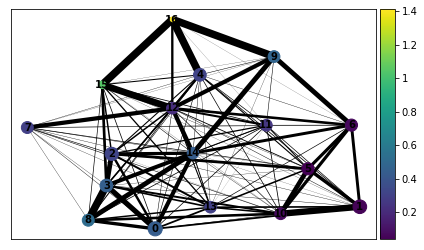

In [5]:
sc.pl.paga(adata, color=['CD27'])

In [6]:
# Step2
adata.obs['leiden'].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16'],
      dtype='object')

In [7]:
adata.obs['leiden_anno'] = adata.obs['leiden']
# annote them with names
adata.obs['leiden_anno'].cat.categories = ['0/Memory1', '1/Naive', '2/Memory1', 
                                           '3/Memory2','4/Mix1', '5/Naive', '6/Mix1', 
                                           '7/Mix1','8/Memory2', '9/Mix1', '10/Naive', 
                                           '11/Mix1', '12/Mix2','13/Memory1', 
                                           '14/Memory1','15/Plasma', '16/Plasma']

In [8]:
adata.obs['leiden_anno2'] = adata.obs['leiden']
# annote them with names
adata.obs['leiden_anno2'].replace({'0':'Memory1', '1':'Naive', '2':'Memory1',
                                  '3':'Memory2','4':'Mix1', '5':'Naive', 
                                  '6':'Mix1', '7':'Mix1','8':'Memory2', 
                                  '9':'Mix1', '10':'Naive', '11':'Mix1', 
                                  '12':'Mix2','13':'Memory1','14':'Memory1',
                                  '15':'Plasma', '16':'Plasma'}, 
                                  inplace=True)
print(adata.obs['leiden_anno2'])

AAACCTGAGAAGATTC-1        Mix1
AAACCTGAGACCCACC-1     Memory1
AAACCTGAGCCACGCT-1        Mix1
AAACCTGAGGCCATAG-1     Memory1
AAACCTGAGGTCGGAT-1     Memory1
                        ...   
TGACTTTGTCTCGTTC-11    Memory1
TGAGCATGTCTAGAGG-11    Memory1
TGATTTCTCAAGGTAA-11      Naive
TTGAACGCATGTTGAC-11      Naive
TTGTAGGGTCGTTGTA-11      Naive
Name: leiden_anno2, Length: 73687, dtype: object


In [9]:
adata.obs['leiden_anno3'] = adata.obs['leiden']
# annote them with names
adata.obs['leiden_anno3'].replace({'0':'Memory', '1':'Naive', '2':'Memory',
                                  '3':'Memory','4':'Activated', '5':'Naive', 
                                  '6':'Activated', '7':'Activated','8':'Memory', 
                                  '9':'Activated', '10':'Naive', '11':'Activated', 
                                  '12':'Activated','13':'Memory','14':'Memory',
                                  '15':'Plasma', '16':'Plasma'}, 
                                  inplace=True)

... storing 'leiden_anno2' as categorical
... storing 'leiden_anno3' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:09)
--> added 'pos', the PAGA positions (adata.uns['paga'])


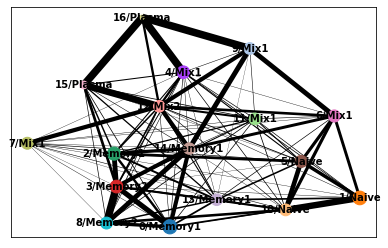

In [10]:
# Step3, PAGA
sc.tl.paga(adata, groups='leiden_anno')
sc.pl.paga(adata, threshold=0.03)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:09:44)


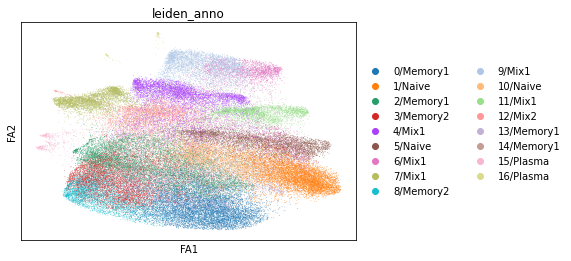

In [11]:
# Step4, PAGA
sc.tl.draw_graph(adata, init_pos='paga')
sc.pl.draw_graph(adata, color=['leiden_anno'], legend_loc='right margin')

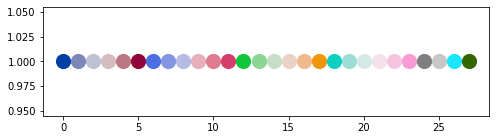

In [12]:
# step5
pl.figure(figsize=(8, 2))
for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_28[i], s=200)
pl.show()

In [13]:
zeileis_colors = np.array(sc.pl.palettes.zeileis_28)
new_colors = np.array(adata.uns['leiden_anno_colors'])

In [14]:
new_colors[[1,5,10]] = zeileis_colors[[15,15,15]]  # Naive / beige
new_colors[[4,6,7,9,11]] = zeileis_colors[[9,9,9,9,9]]  # Mix1 / light pink
new_colors[[12]] = zeileis_colors[[8]]  # Mix2_MT / blue
new_colors[[15,16]] = zeileis_colors[[6,6]]  # plasma / blue
new_colors[[0,2,13]] = zeileis_colors[[14,14,14]]  # Memory1 / green
new_colors[[14]] = zeileis_colors[[13]]  # Memory1.5 / green
new_colors[[3,8]] = zeileis_colors[[12,12]]  # Memory2 / green

In [15]:
adata.uns['leiden_anno_colors'] = new_colors

--> added 'pos', the PAGA positions (adata.uns['paga'])


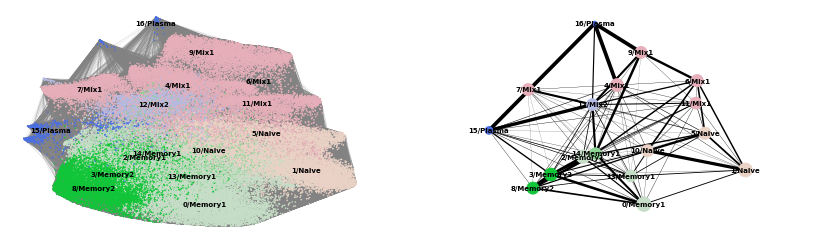

In [16]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=7, fontsize=7, frameon=False, edges=True, save=True)

In [17]:
# Step6 pseudotime
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == '1/Naive')[0]
sc.tl.dpt(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:01)
    eigenvalues of transition matrix
    [1.         0.9724949  0.97051674 0.96933144 0.9660895  0.96286017
     0.959923   0.9577176  0.95335096 0.95195717 0.94993657 0.94725686
     0.94395703 0.9377981  0.935706  ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:13)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


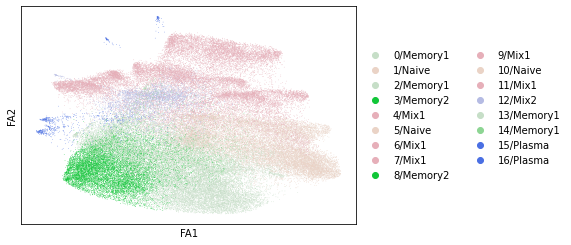

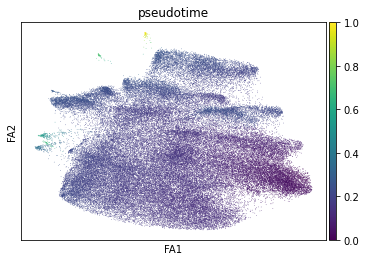

In [18]:
#plot again to see full legends info
sc.pl.draw_graph(adata, color=['leiden_anno'],
                 legend_loc='right margin',title = ['']) 
sc.pl.draw_graph(adata, color=['dpt_pseudotime'],
                 legend_loc='right margin',title = ['pseudotime'])

In [19]:
adata.write("5.scanpy_trajectory_B.h5ad")

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:09)
--> added 'pos', the PAGA positions (adata.uns['paga'])


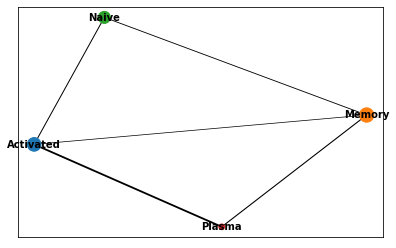

In [20]:
sc.tl.paga(adata, groups='leiden_anno3')
sc.pl.paga(adata, threshold=0.03)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:10:02)


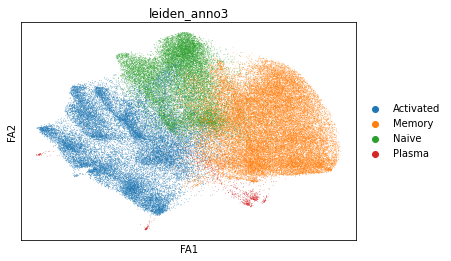

In [21]:
sc.tl.draw_graph(adata, init_pos='paga')
sc.pl.draw_graph(adata, color=['leiden_anno3'], legend_loc='right margin')

In [22]:
zeileis_colors = np.array(sc.pl.palettes.zeileis_28)
new_colors = np.array(adata.uns['leiden_anno3_colors'])
new_colors[[0]] = zeileis_colors[[14]]  # Memory1 / green
new_colors[[1]] = zeileis_colors[[17]]  # Mix1 / blue
new_colors[[2]] = zeileis_colors[[15]]  # Naive / beige
new_colors[[3]] = zeileis_colors[[11]]  # Plasma / red
adata.uns['leiden_anno2_colors'] = new_colors

--> added 'pos', the PAGA positions (adata.uns['paga'])


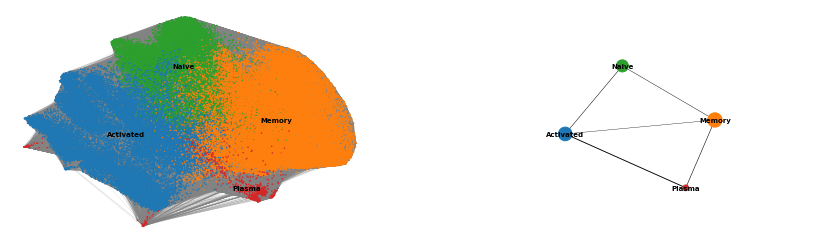

In [23]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=7, fontsize=7, frameon=False, edges=True, save=True)

In [24]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno3']  == 'Naive')[0]
sc.tl.dpt(adata)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


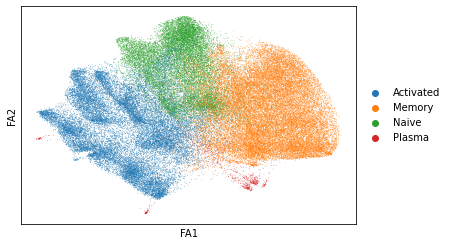

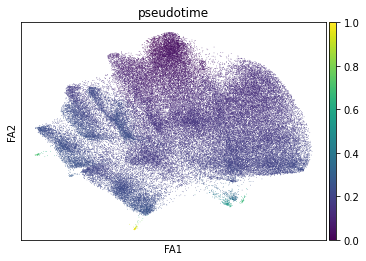

In [25]:
#plot again to see full legends info
sc.pl.draw_graph(adata, color=['leiden_anno3'],
                 legend_loc='right margin',title = ['']) 
sc.pl.draw_graph(adata, color=['dpt_pseudotime'],
                 legend_loc='right margin',title = ['pseudotime'])

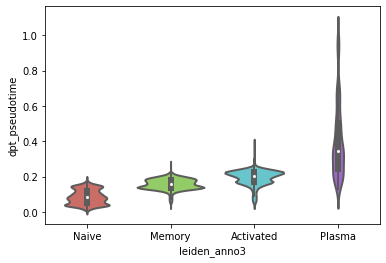

In [26]:
sns.violinplot(x="leiden_anno3", y="dpt_pseudotime", data=adata.obs,
            linewidth = 2,   
            width = 0.8,    
            palette = 'hls', 
            order = ['Naive','Memory','Activated','Plasma'],  
            scale = 'area',  
            gridsize = 50,   
            inner = 'box',   
            #bw = 0.8        
           )

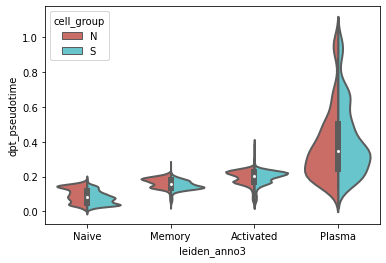

In [27]:
sns.violinplot(x="leiden_anno3", y="dpt_pseudotime", data=adata.obs,
            linewidth = 2,   
            width = 0.8,    
            hue = 'cell_group',
            split=True,  
            order = ['Naive','Memory','Activated','Plasma'],
            palette = 'hls', 
            scale = 'area',  
            gridsize = 50,   
            inner = 'box',   
            #bw = 0.8        
           )

In [28]:
adata.write("5.scanpy_trajectory_B.h5ad")